In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

In [26]:
rhpass=pd.read_csv("csv_filter_ssh_all_attack_redhat_tcpdump.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-04 10:04:53,10.10.10.5,10.10.10.20,SSH,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
1,2011-11-04 10:05:01,10.10.10.5,10.10.10.15,SSH,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2,2011-11-04 10:05:02,10.10.10.5,10.10.10.15,SSH,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
3,2011-11-04 10:05:06,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
4,2011-11-04 10:05:07,10.10.10.20,10.10.10.5,SSHv1,93,Client: Protocol (SSH-1.5-Nmap-SSH1-Hostkey)


In [27]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [28]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-04 10:04:53,10.10.10.5,10.10.10.20,SSH,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
1,2011-11-04 10:05:01,10.10.10.5,10.10.10.15,SSH,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
2,2011-11-04 10:05:02,10.10.10.5,10.10.10.15,SSH,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
3,2011-11-04 10:05:06,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
4,2011-11-04 10:05:07,10.10.10.20,10.10.10.5,SSHv1,93,Client: Protocol (SSH-1.5-Nmap-SSH1-Hostkey),Server


In [29]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,89,2011-11-04 10:04:53,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
1,77,2011-11-04 10:05:01,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2,77,2011-11-04 10:05:02,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
3,89,2011-11-04 10:05:06,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
4,93,2011-11-04 10:05:07,Client: Protocol (SSH-1.5-Nmap-SSH1-Hostkey)


In [30]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-04 10:04:53,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-04 10:05:01,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-04 10:05:02,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-04 10:05:06,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-04 10:05:07,93,Client: Protocol (SSH-1.5-Nmap-SSH1-Hostkey)


In [31]:
infodata2.resample('H',how=sum).head()

,Length
Time,
2011-11-04 10:00:00,710889
2011-11-04 11:00:00,21568080
2011-11-04 12:00:00,22716148
2011-11-04 13:00:00,15417161
2011-11-04 14:00:00,15426298


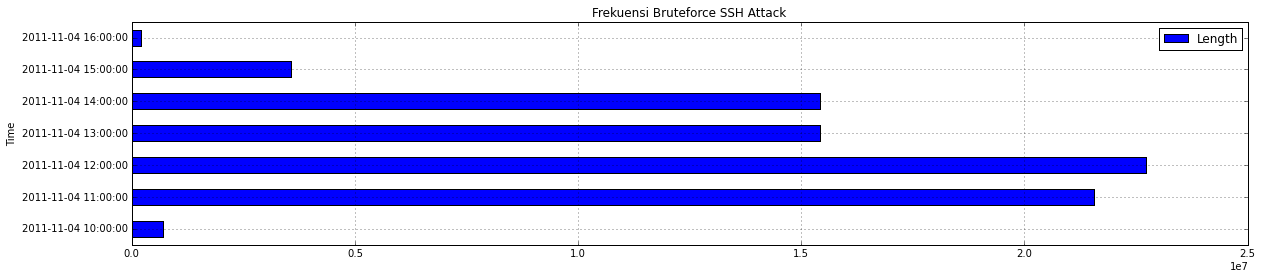

In [37]:
infodata2_plot = infodata2.resample('H',how=sum).plot(kind="barh",title="Frekuensi Bruteforce SSH Attack",figsize=(20,4),legend=True)

In [39]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce SSH Attack time.png")

In [33]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-04 10:04:53,10.10.10.5,10.10.10.20,SSH,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
1,2011-11-04 10:05:01,10.10.10.5,10.10.10.15,SSH,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
2,2011-11-04 10:05:02,10.10.10.5,10.10.10.15,SSH,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
3,2011-11-04 10:05:06,10.10.10.5,10.10.10.20,SSHv1,89,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
4,2011-11-04 10:05:07,10.10.10.20,10.10.10.5,SSHv1,93,Client: Protocol (SSH-1.5-Nmap-SSH1-Hostkey),Server


In [34]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination Protocol          
10.10.10.15 10.10.10.5  SSH          20638
                        SSHv2         6168
10.10.10.20 10.10.10.5  SSH          65696
                        SSHv1         1074
                        SSHv2     33216862

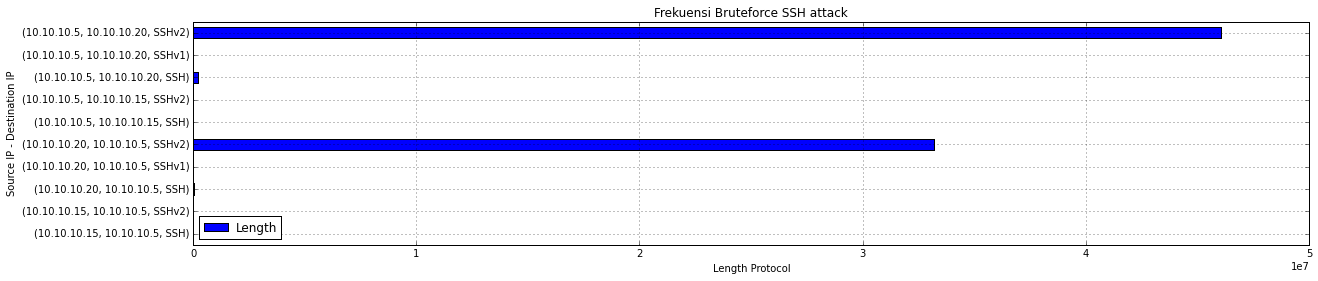

In [36]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frekuensi Bruteforce SSH attack",figsize=(20,4))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [40]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Bruteforce SSH Attack.png")